<a href="https://colab.research.google.com/github/elvansahin/PortfolioProjects/blob/main/ANNCHFNEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import initializers
from keras.layers import BatchNormalization
data = pd.read_csv('chf_all.csv')

y_data = data['CHF'].values.reshape(-1,1)

x_data = []

for i, rows in data.iterrows():
    x_data.append([ rows['D'], rows['L'],  rows['P'], rows['G'], rows['X'] ])


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=42, test_size=0.2, shuffle=True)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42, shuffle=True)


from sklearn.preprocessing import StandardScaler
# Fit scaler on training data only
scaler_x = StandardScaler().fit(x_data)
x_data = scaler_x.transform(x_data)
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)
# x_val = scaler_x.transform(x_val)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
# x_val = np.asarray(x_val)
# y_val = np.asarray(y_val)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras import regularizers
initializer = tf.keras.initializers.HeNormal(seed=1)
model = tf.keras.Sequential([
        # First Dense Block
        tf.keras.layers.Dense(250, input_shape=(5,), kernel_initializer=initializer,kernel_regularizer=regularizers.L2(0.01)),
          #  tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
          #  tf.keras.layers.Dropout(0.1),

        # Second Dense Block
        tf.keras.layers.Dense(250, kernel_initializer=initializer,kernel_regularizer=regularizers.L2(0.01)),
        #  tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        #  tf.keras.layers.Dropout(0.1),

        # Third Dense Block
        tf.keras.layers.Dense(250, kernel_initializer=initializer),
        #  tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        #  tf.keras.layers.Dropout(0.1),

        # Fourth Dense Block (Added Layer)
        tf.keras.layers.Dense(250, kernel_initializer=initializer),
        #  tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
          # tf.keras.layers.Dropout(0.1),

        # Output Layer
        tf.keras.layers.Dense(1, kernel_regularizer=regularizers.L2(0.01)),
    ])

model.compile(optimizer=Adam(learning_rate=5e-3), loss='mse', metrics=['mse'])

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
# hist = model.fit(np.array(x_train), np.array(y_train),batch_size=218, epochs=1000, validation_data=(np.array(x_val), np.array(y_val)),verbose = 1, callbacks=[early_stopping])
hist = model.fit(np.array(x_train), np.array(y_train),batch_size=512, epochs=2000, validation_split=0.3, verbose = 1, callbacks=[early_stopping])

# Evaluation

loss, mse = model.evaluate(x_test, y_test, batch_size=1)
print('acc : ', mse)

# Calculate predictions
yte_predict = model.predict(x_test)
ytr_predict = model.predict(x_train)
y_predict = model.predict(x_data)

# Calculate ratios of predicted to measured
ratio_train = ytr_predict / y_train
ratio_test = yte_predict / y_test
ratio_all = y_predict / y_data

# Mean of ratios
mean_ratio_train = np.mean(ratio_train)
mean_ratio_test = np.mean(ratio_test)
mean_ratio_all = np.mean(ratio_all)

# Standard deviation of ratios
std_ratio_train = np.std(ratio_train)
std_ratio_test = np.std(ratio_test)
std_ratio_all = np.std(ratio_all)

# Print mean and standard deviation of ratios for training
print('Mean P/M (Train): {:.4f}'.format(mean_ratio_train))
print('Standard Deviation P/M (Train): {:.4f}'.format(std_ratio_train))

# Print mean and standard deviation of ratios for testing
print('Mean P/M (Test): {:.4f}'.format(mean_ratio_test))
print('Standard Deviation P/M (Test): {:.4f}'.format(std_ratio_test))

# Print mean and standard deviation of ratios for all
print('Mean P/M (All): {:.4f}'.format(mean_ratio_all))
print('Standard Deviation P/M (All): {:.4f}'.format(std_ratio_all))

# RMSE
RMSEtr = np.sqrt(mean_squared_error(y_train, ytr_predict))
RMSEte = np.sqrt(mean_squared_error(y_test, yte_predict))
RMSEAll = np.sqrt(mean_squared_error(y_data, y_predict))

# MAE
MAEtr = mean_absolute_error(y_train, ytr_predict)
MAEte = mean_absolute_error(y_test, yte_predict)
MAEAll = mean_absolute_error(y_data, y_predict)

# Mean of actual values
mean_y_train = np.mean(y_train)
mean_y_test = np.mean(y_test)
mean_y_all = np.mean(y_data)

# RMSE percentage
RMSEtr_pct = (RMSEtr / mean_y_train) * 100
RMSEte_pct = (RMSEte / mean_y_test) * 100
RMSEAll_pct = (RMSEAll / mean_y_all) * 100

# MAE percentage
MAEtr_pct = (MAEtr / mean_y_train) * 100
MAEte_pct = (MAEte / mean_y_test) * 100
MAEAll_pct = (MAEAll / mean_y_all) * 100

# Print the results
print('RMSEtr: {:.4f}, RMSEtr %: {:.2f}%'.format(RMSEtr, RMSEtr_pct))
print('RMSEte: {:.4f}, RMSEte %: {:.2f}%'.format(RMSEte, RMSEte_pct))
print('RMSEAll: {:.4f}, RMSEAll %: {:.2f}%'.format(RMSEAll, RMSEAll_pct))

print('MAEtr: {:.4f}, MAEtr %: {:.2f}%'.format(MAEtr, MAEtr_pct))
print('MAEte: {:.4f}, MAEte %: {:.2f}%'.format(MAEte, MAEte_pct))
print('MAEAll: {:.4f}, MAEAll %: {:.2f}%'.format(MAEAll, MAEAll_pct))

# # R2
# r2_ytr_predict = r2_score(y_train, ytr_predict)
# r2_yte_predict = r2_score(y_test, yte_predict)

# print('R2tr: {:.4f}'.format(r2_ytr_predict))
# print('R2te: {:.4f}'.format(r2_yte_predict))

# Calculate the numerator: Sum of squared errors
sse_train = np.sum((y_train - ytr_predict) ** 2)
sse_test = np.sum((y_test - yte_predict) ** 2)
sse_all = np.sum((y_data - y_predict) ** 2)

# Calculate the denominator: Total sum of squares
tss_train = np.sum((y_train - mean_y_train) ** 2)
tss_test = np.sum((y_test - mean_y_test) ** 2)
tss_all = np.sum((y_data - mean_y_all) ** 2)

# EQ^2 calculation
EQ2_train = sse_train / tss_train
EQ2_test = sse_test / tss_test
EQ2_all = sse_all / tss_all

# Print the results
print('EQ^2 (Train): {:.4f}'.format(EQ2_train))
print('EQ^2 (Test): {:.4f}'.format(EQ2_test))
print('EQ^2 (All): {:.4f}'.format(EQ2_all))

Epoch 1/2000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 3437590.0000 - mse: 3437579.2500 - val_loss: 676876.0000 - val_mse: 676864.6250
Epoch 2/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 576352.3125 - mse: 576340.7500 - val_loss: 501884.0000 - val_mse: 501872.0625
Epoch 3/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 448447.2500 - mse: 448435.1875 - val_loss: 458684.1562 - val_mse: 458672.0312
Epoch 4/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 397903.1562 - mse: 397890.9688 - val_loss: 395407.9062 - val_mse: 395395.5312
Epoch 5/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 355598.2188 - mse: 355585.8125 - val_loss: 353510.6875 - val_mse: 353498.0312
Epoch 6/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 298956.1562 - mse: 298943.5000 - val_loss: 270813.9375 - val_mse: 270801.0625
Epoch 7/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 227961.6250 - mse: 227948.6719 - val_loss: 219278.7500 - val_mse: 219265.6562
Epoch 8/2000
27/27 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Assuming y_predict contains your predicted CHF values
data['Predicted_CHF'] = y_predict

# Save the DataFrame back to CSV
data.to_csv('chf_all_with_predictions.csv', index=False)


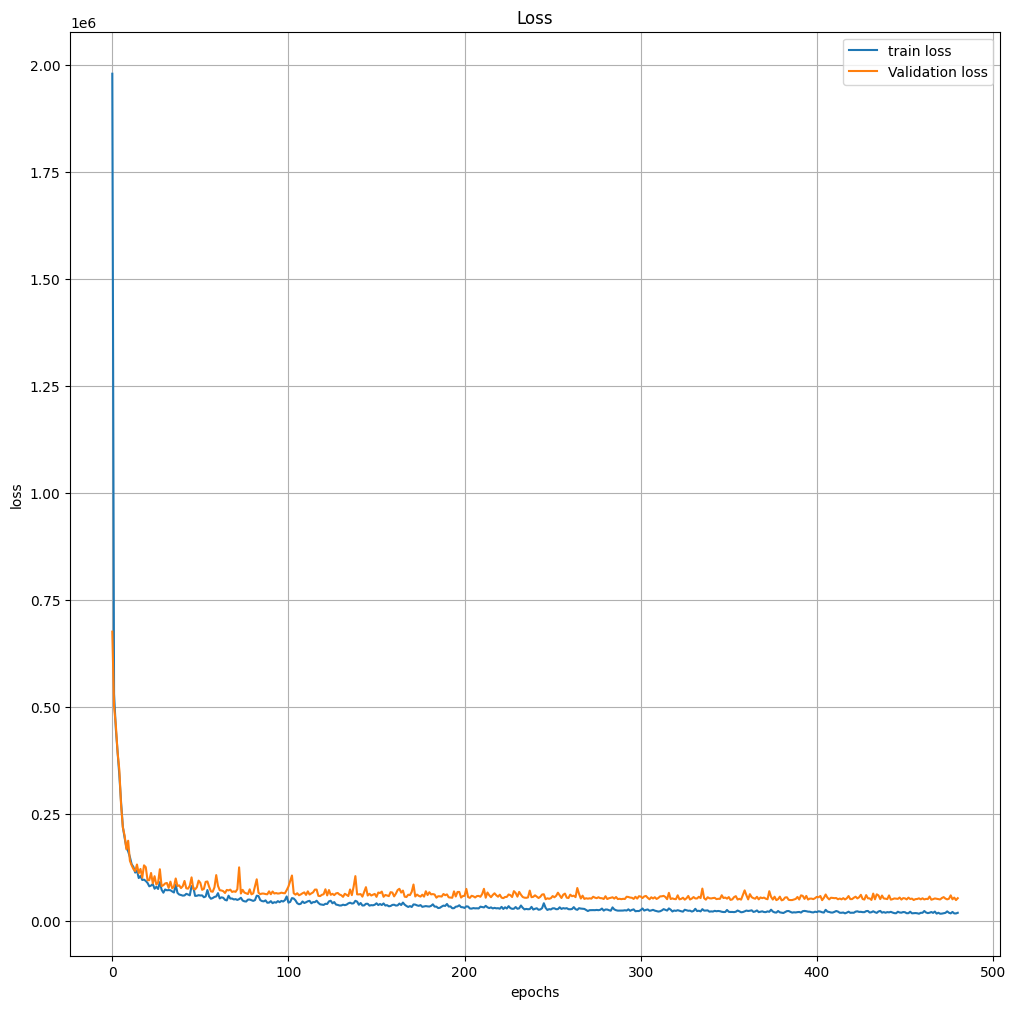

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 12))

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='Validation loss')

plt.legend(loc='best')

plt.show()

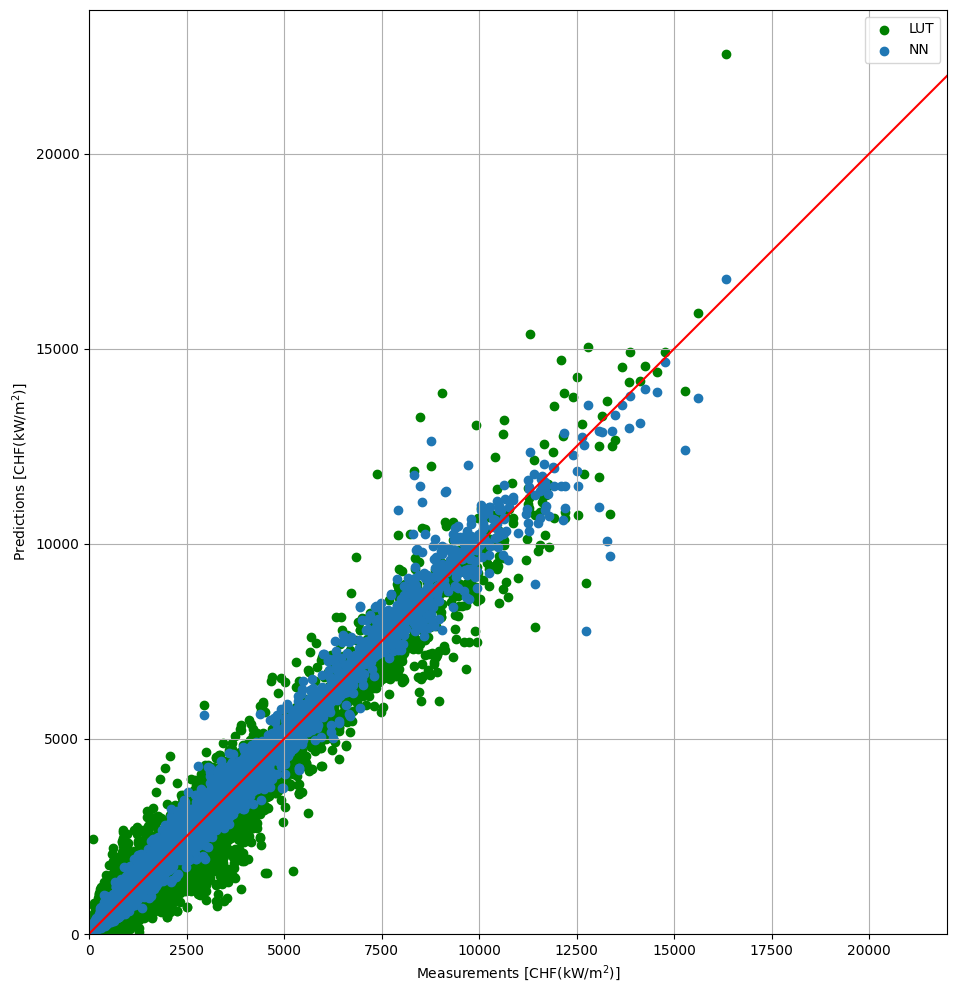

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# Load your first dataset
# Assuming y_data and y_predict are already defined from your first dataset

# Load the second dataset
second_data = pd.read_csv('chf_public_LUT.csv')

# Extract the x and y data from the second dataset
x_data_second = second_data['CHF'].values
y_data_second = second_data['CHF LUT'].values

# Create the plot
plt.figure(figsize=(12, 12))

# Second scatter plot
plt.scatter(x_data_second, y_data_second, label='LUT', color='green')

# First scatter plot
plt.scatter(y_data, y_predict, label='NN')

# Customize the plot
plt.xlabel('Measurements [CHF(kW/m$^2$)]')
plt.ylabel('Predictions [CHF(kW/m$^2$)]')
plt.grid()
plt.axis('equal')
plt.axis('square')
plt.xlim([0, 22000])
plt.ylim([0, plt.ylim()[1]])

# Draw reference lines
_ = plt.plot([-100000, 100000], [-100000, 100000], color='red')
# _ = plt.plot([-100000, 100000], [-130000, 130000], color='blue')
# _ = plt.plot([-100000, 100000], [-70000, 70000], color='blue')

# Add a legend to distinguish between the two datasets
plt.legend()

# Show the plot
plt.show()


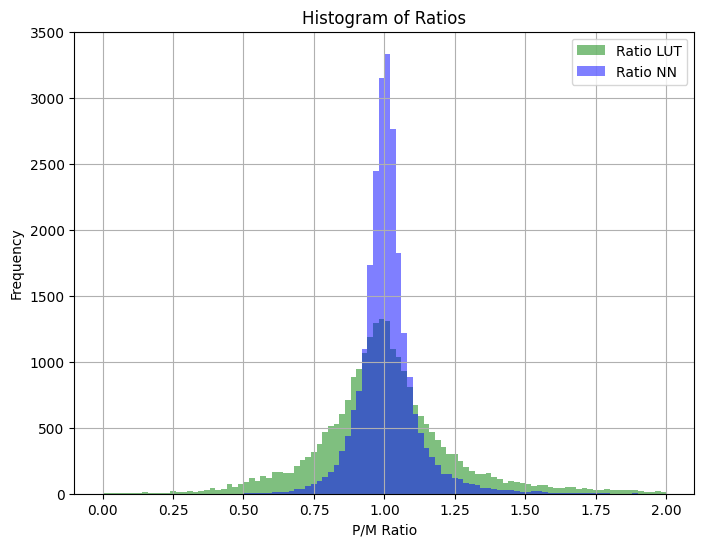

In [ ]:
import matplotlib.pyplot as plt

# Calculate the ratios
ratio_LUT = y_data_second / x_data_second
ratio_all = y_predict / y_data

# Set the x-axis range to focus on the main data distribution
x_min = 0  # Set the minimum x-axis value
x_max = 2  # Set the maximum x-axis value (adjust as needed)

# Plot histograms on the same graph with a reduced x-axis range
plt.figure(figsize=(8, 6))

# First histogram for ratio_LUT
plt.hist(ratio_LUT, bins=100, alpha=0.5, label='Ratio LUT', color='green', range=(x_min, x_max))

# Second histogram for ratio_all
plt.hist(ratio_all, bins=100, alpha=0.5, label='Ratio NN', color='blue', range=(x_min, x_max))

# Customize the plot
plt.xlabel('P/M Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Ratios')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()


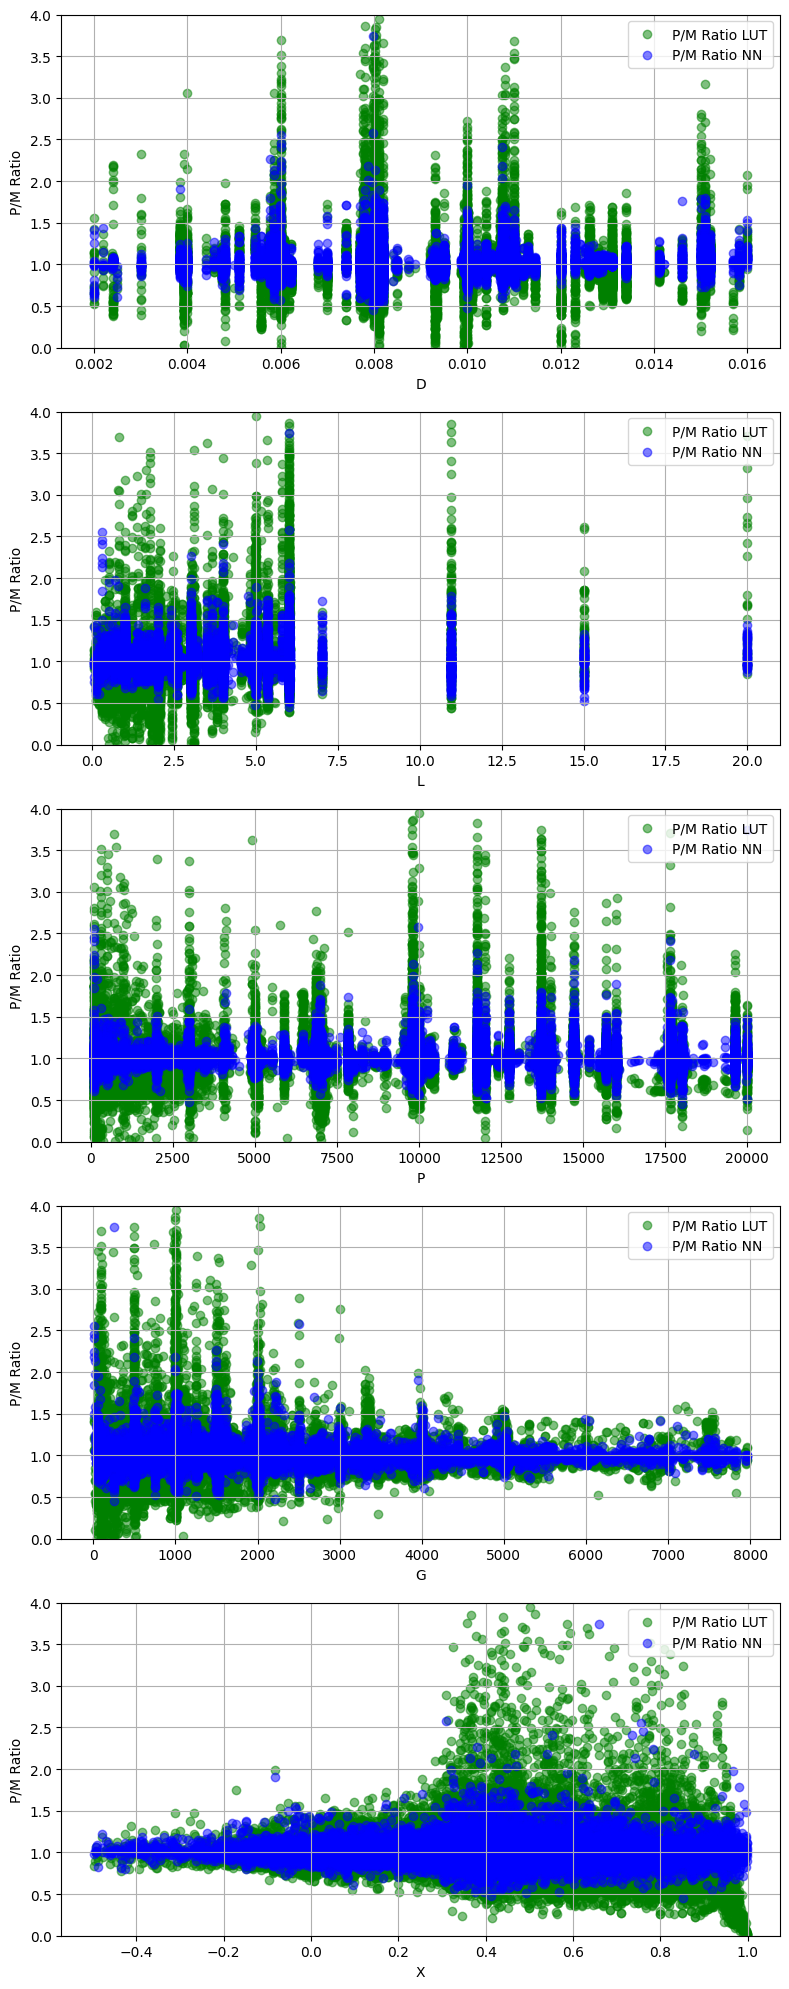

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace with the actual path if needed)
data = pd.read_csv('chf_all.csv')

# Extract the input parameters and target values
x_data = data[['D', 'L', 'P', 'G', 'X']].values
y_data = data['CHF'].values.reshape(-1, 1)

# Apply the scaler (assuming StandardScaler was used before)
scaler_x = StandardScaler().fit(x_data)
x_data_scaled = scaler_x.transform(x_data)

# Rescale the input parameters back to their original values
x_data_rescaled = scaler_x.inverse_transform(x_data_scaled)

# Calculate the ratio_all (assuming y_predict has been calculated earlier)
ratio_all = y_predict / y_data

# Plot input parameters vs. ratio_all
input_params = ['D', 'L', 'P', 'G', 'X']
num_params = len(input_params)

# Create subplots
fig, axes = plt.subplots(num_params, 1, figsize=(8, 4*num_params))

# Define y-axis limits (adjust as needed)
y_min = 0  # Set the minimum y-axis value
y_max = 4  # Set the maximum y-axis value

# Plot each input parameter against ratio_all
for i, param in enumerate(input_params):
    axes[i].scatter(x_data_rescaled[:, i], ratio_LUT, label='P/M Ratio LUT', color='green', alpha=0.5)
    axes[i].scatter(x_data_rescaled[:, i], ratio_all, label='P/M Ratio NN', color='blue', alpha=0.5)
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('P/M Ratio')
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

    # Set y-axis limits
    axes[i].set_ylim([y_min, y_max])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load the chf_blind.csv file
blind_data = pd.read_csv('chf_blind.csv')

# Step 2: Preprocess the data (scaling the inputs)
x_blind_data = []

for i, rows in blind_data.iterrows():
    x_blind_data.append([rows['D'], rows['L'], rows['P'], rows['G'], rows['X']])

x_blind_data = scaler_x.transform(x_blind_data)
x_blind_data = np.asarray(x_blind_data)

# Step 3: Make predictions
blind_predictions = model.predict(x_blind_data)

# Step 4: Save the predictions to the 'CHF' column in the same file
blind_data['CHF'] = blind_predictions

# Save the updated dataframe to a new CSV file (optional)
blind_data.to_csv('chf_blind_predictions.csv', index=False)

# If you want to overwrite the original file:
# blind_data.to_csv('chf_blind.csv', index=False)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


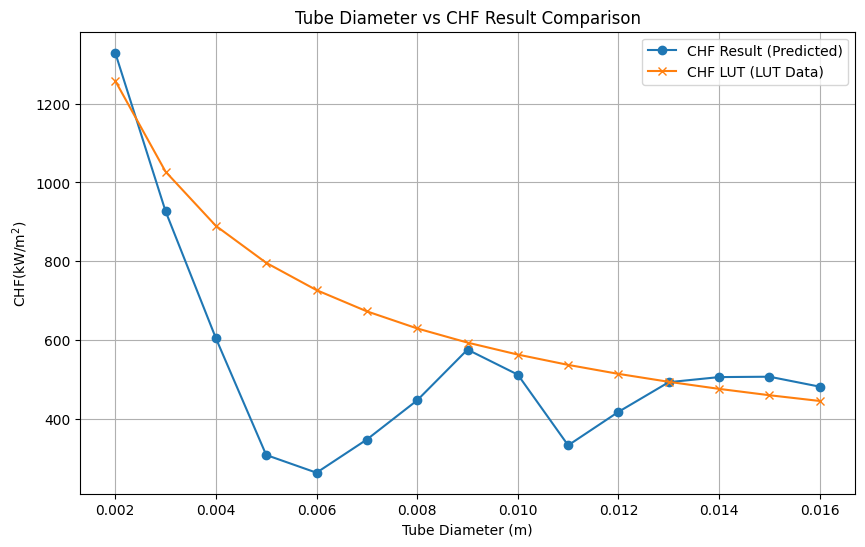

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Slice_01.csv file, skipping the first two rows
slice_data_1 = pd.read_csv('Slice_01.csv', skiprows=[1])

# Convert column 'Pressure' by multiplying by 10E-4
slice_data_1['Pressure'] = slice_data_1['Pressure'] * 10E-4

# Step 2: Preprocess the data (scaling the inputs)
x_slice_data_1 = []

for i, rows in slice_data_1.iterrows():
    x_slice_data_1.append([rows['Tube Diameter'], rows['Heated Length'], rows['Pressure'], rows['Mass Flux'], rows['Outlet Quality']])

x_slice_data_1 = scaler_x.transform(x_slice_data_1)
x_slice_data_1 = np.asarray(x_slice_data_1)

# Step 3: Make predictions
slice_predictions_1 = model.predict(x_slice_data_1)

# Step 4: Save the predictions to the 'CHF Result' column in the same file
slice_data_1['CHF Result'] = slice_predictions_1

# Save the updated dataframe to a new CSV file (optional)
slice_data_1.to_csv('Slice_01_predictions.csv', index=False)

# Step 5: Load the Slice_01_LUT.csv file and extract the CHF LUT values
slice_lut = pd.read_csv('Slice_01_LUT.csv', skiprows=[1])
slice_lut['CHF LUT'] = slice_lut['CHF LUT'] * 10E-4

# Step 6: Plot Tube Diameter vs CHF Result and compare it with CHF LUT
plt.figure(figsize=(10, 6))
plt.plot(slice_data_1['Tube Diameter'], slice_data_1['CHF Result'], label='CHF Result (Predicted)', marker='o')
plt.plot(slice_lut['Tube Diameter'], slice_lut['CHF LUT'], label='CHF LUT (LUT Data)', marker='x')

plt.xlabel('Tube Diameter (m)')
plt.ylabel('CHF(kW/m$^2$)')
plt.title('Tube Diameter vs CHF Result Comparison')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


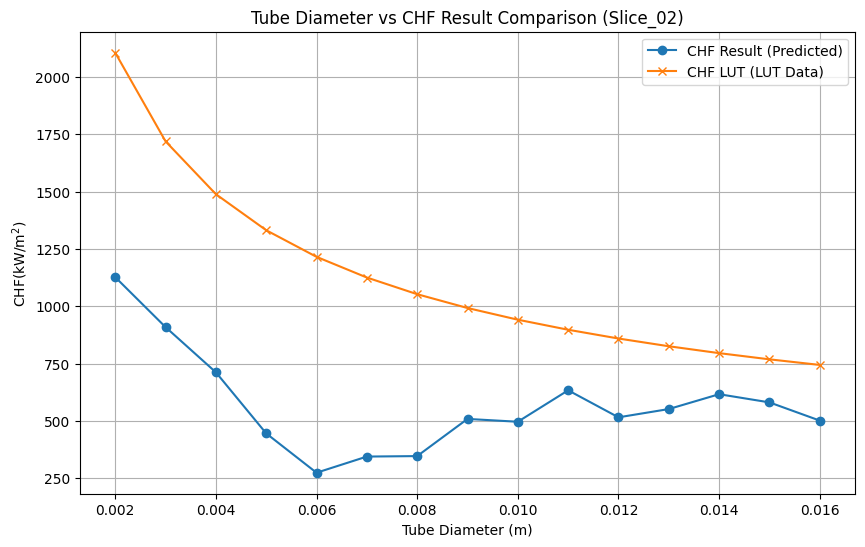

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Slice_02.csv file, skipping the first two rows
slice_data_2 = pd.read_csv('Slice_02.csv', skiprows=[1])

# Convert column 'Pressure' by multiplying by 10E-4
slice_data_2['Pressure'] = slice_data_2['Pressure'] * 10E-4

# Step 2: Preprocess the data (scaling the inputs)
x_slice_data_2 = []

for i, rows in slice_data_2.iterrows():
    x_slice_data_2.append([rows['Tube Diameter'], rows['Heated Length'], rows['Pressure'], rows['Mass Flux'], rows['Outlet Quality']])

x_slice_data_2 = scaler_x.transform(x_slice_data_2)
x_slice_data_2 = np.asarray(x_slice_data_2)

# Step 3: Make predictions
slice_predictions_2 = model.predict(x_slice_data_2)

# Step 4: Save the predictions to the 'CHF Result' column in the same file
slice_data_2['CHF Result'] = slice_predictions_2

# Save the updated dataframe to a new CSV file (optional)
slice_data_2.to_csv('Slice_02_predictions.csv', index=False)

# Step 5: Load the Slice_02_LUT.csv file and extract the CHF LUT values
slice_lut_2 = pd.read_csv('Slice_02_LUT.csv', skiprows=[1])
slice_lut_2['CHF LUT'] = slice_lut_2['CHF LUT'] * 10E-4

# Step 6: Plot Tube Diameter vs CHF Result and compare it with CHF LUT
plt.figure(figsize=(10, 6))
plt.plot(slice_data_2['Tube Diameter'], slice_data_2['CHF Result'], label='CHF Result (Predicted)', marker='o')
plt.plot(slice_lut_2['Tube Diameter'], slice_lut_2['CHF LUT'], label='CHF LUT (LUT Data)', marker='x')

plt.xlabel('Tube Diameter (m)')
plt.ylabel('CHF(kW/m$^2$)')
plt.title('Tube Diameter vs CHF Result Comparison (Slice_02)')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


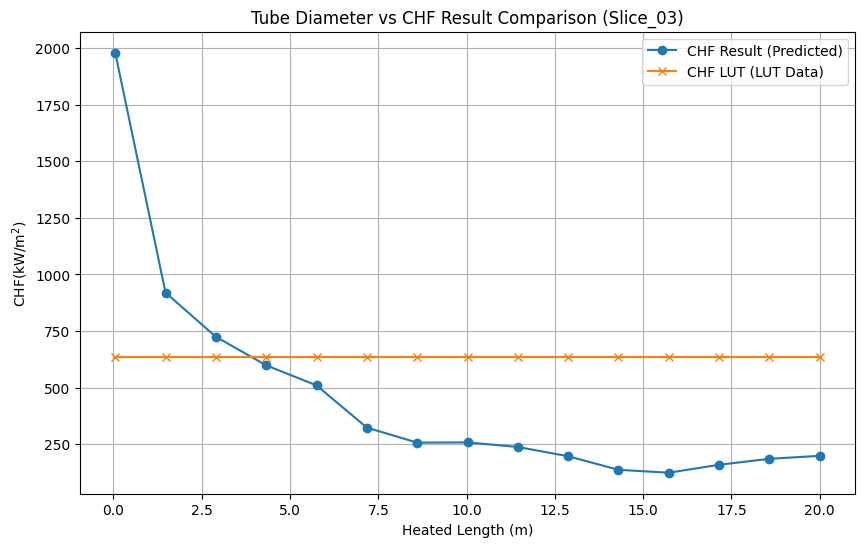

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Slice_03.csv file, skipping the first two rows
slice_data_3 = pd.read_csv('Slice_03.csv', skiprows=[1])

# Convert column 'Pressure' by multiplying by 10E-4
slice_data_3['Pressure'] = slice_data_3['Pressure'] * 10E-4

# Step 2: Preprocess the data (scaling the inputs)
x_slice_data_3 = []

for i, rows in slice_data_3.iterrows():
    x_slice_data_3.append([rows['Tube Diameter'], rows['Heated Length'], rows['Pressure'], rows['Mass Flux'], rows['Outlet Quality']])

x_slice_data_3 = scaler_x.transform(x_slice_data_3)
x_slice_data_3 = np.asarray(x_slice_data_3)

# Step 3: Make predictions
slice_predictions_3 = model.predict(x_slice_data_3)

# Step 4: Save the predictions to the 'CHF Result' column in the same file
slice_data_3['CHF Result'] = slice_predictions_3

# Save the updated dataframe to a new CSV file (optional)
slice_data_3.to_csv('Slice_03_predictions.csv', index=False)

# Step 5: Load the Slice_03_LUT.csv file and extract the CHF LUT values
slice_lut_3 = pd.read_csv('Slice_03_LUT.csv', skiprows=[1])
slice_lut_3['CHF LUT'] = slice_lut_3['CHF LUT'] * 10E-4

# Step 6: Plot Tube Diameter vs CHF Result and compare it with CHF LUT
plt.figure(figsize=(10, 6))
plt.plot(slice_data_3['Heated Length'], slice_data_3['CHF Result'], label='CHF Result (Predicted)', marker='o')
plt.plot(slice_lut_3['Heated Length'], slice_lut_3['CHF LUT'], label='CHF LUT (LUT Data)', marker='x')

plt.xlabel('Heated Length (m)')
plt.ylabel('CHF(kW/m$^2$)')
plt.title('Tube Diameter vs CHF Result Comparison (Slice_03)')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


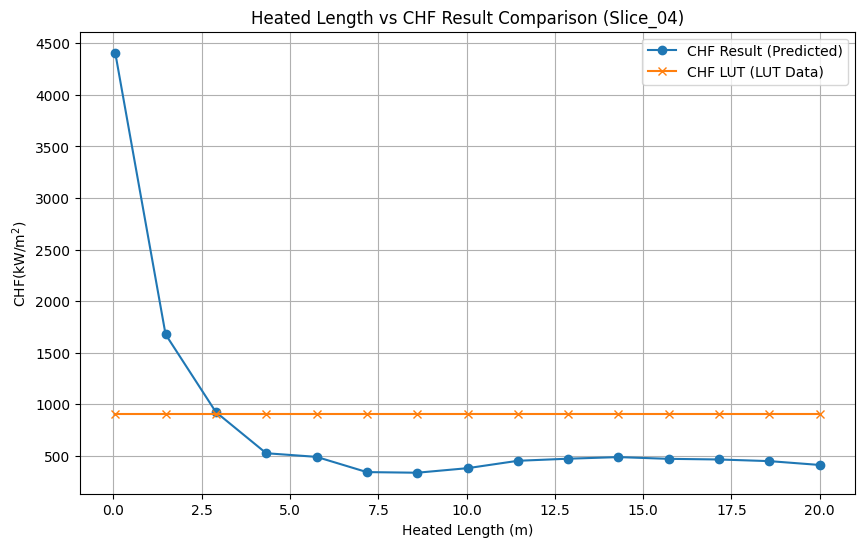

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Slice_04.csv file, skipping the first two rows
slice_data_4 = pd.read_csv('Slice_04.csv', skiprows=[1])

# Convert column 'Pressure' by multiplying by 10E-4
slice_data_4['Pressure'] = slice_data_4['Pressure'] * 10E-4

# Step 2: Preprocess the data (scaling the inputs)
x_slice_data_4 = []

for i, rows in slice_data_4.iterrows():
    x_slice_data_4.append([rows['Tube Diameter'], rows['Heated Length'], rows['Pressure'], rows['Mass Flux'], rows['Outlet Quality']])

x_slice_data_4 = scaler_x.transform(x_slice_data_4)
x_slice_data_4 = np.asarray(x_slice_data_4)

# Step 3: Make predictions
slice_predictions_4 = model.predict(x_slice_data_4)

# Step 4: Save the predictions to the 'CHF Result' column in the same file
slice_data_4['CHF Result'] = slice_predictions_4

# Save the updated dataframe to a new CSV file (optional)
slice_data_4.to_csv('Slice_04_predictions.csv', index=False)

# Step 5: Load the Slice_04_LUT.csv file and extract the CHF LUT values
slice_lut_4 = pd.read_csv('Slice_04_LUT.csv', skiprows=[1])
slice_lut_4['CHF LUT'] = slice_lut_4['CHF LUT'] * 10E-4

# Step 6: Plot Heated Length vs CHF Result and compare it with CHF LUT
plt.figure(figsize=(10, 6))
plt.plot(slice_data_4['Heated Length'], slice_data_4['CHF Result'], label='CHF Result (Predicted)', marker='o')
plt.plot(slice_lut_4['Heated Length'], slice_lut_4['CHF LUT'], label='CHF LUT (LUT Data)', marker='x')

plt.xlabel('Heated Length (m)')
plt.ylabel('CHF(kW/m$^2$)')
plt.title('Heated Length vs CHF Result Comparison (Slice_04)')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


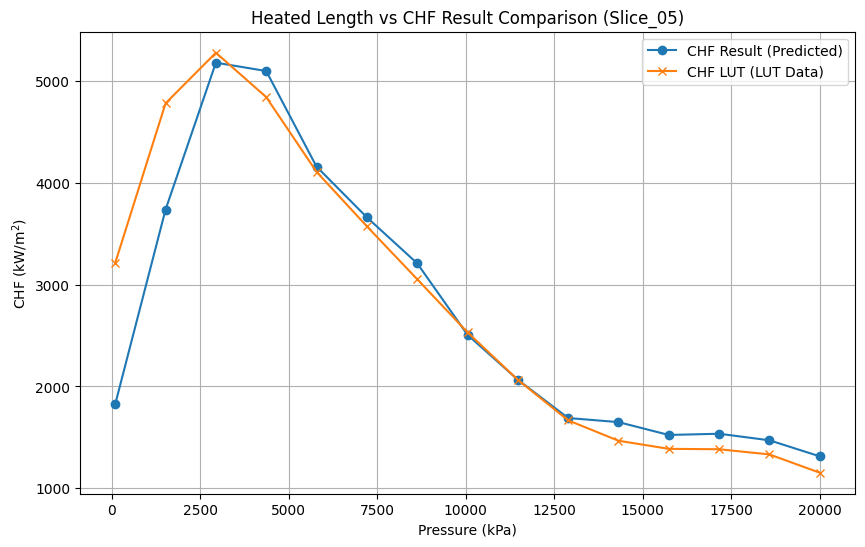

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Slice_05.csv file, skipping the first two rows
slice_data_5 = pd.read_csv('Slice_05.csv', skiprows=[1])

# Convert column 'Pressure' by multiplying by 10E-4
slice_data_5['Pressure'] = slice_data_5['Pressure'] * 10E-4

# Step 2: Preprocess the data (scaling the inputs)
x_slice_data_5 = []

for i, rows in slice_data_5.iterrows():
    x_slice_data_5.append([rows['Tube Diameter'], rows['Heated Length'], rows['Pressure'], rows['Mass Flux'], rows['Outlet Quality']])

x_slice_data_5 = scaler_x.transform(x_slice_data_5)
x_slice_data_5 = np.asarray(x_slice_data_5)

# Step 3: Make predictions
slice_predictions_5 = model.predict(x_slice_data_5)

# Step 4: Save the predictions to the 'CHF Result' column in the same file
slice_data_5['CHF Result'] = slice_predictions_5

# Save the updated dataframe to a new CSV file (optional)
slice_data_5.to_csv('Slice_05_predictions.csv', index=False)

# Step 5: Load the Slice_05_LUT.csv file and extract the CHF LUT values
slice_lut_5 = pd.read_csv('Slice_05_LUT.csv', skiprows=[1])
slice_lut_5['CHF LUT'] = slice_lut_5['CHF LUT'] * 10E-4

# Step 6: Plot Heated Length vs CHF Result and compare it with CHF LUT
plt.figure(figsize=(10, 6))
plt.plot(slice_data_5['Pressure'], slice_data_5['CHF Result'], label='CHF Result (Predicted)', marker='o')
plt.plot(slice_data_5['Pressure'], slice_lut_5['CHF LUT'], label='CHF LUT (LUT Data)', marker='x')

plt.xlabel('Pressure (kPa)')
plt.ylabel('CHF (kW/m$^2$)')
plt.title('Heated Length vs CHF Result Comparison (Slice_05)')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


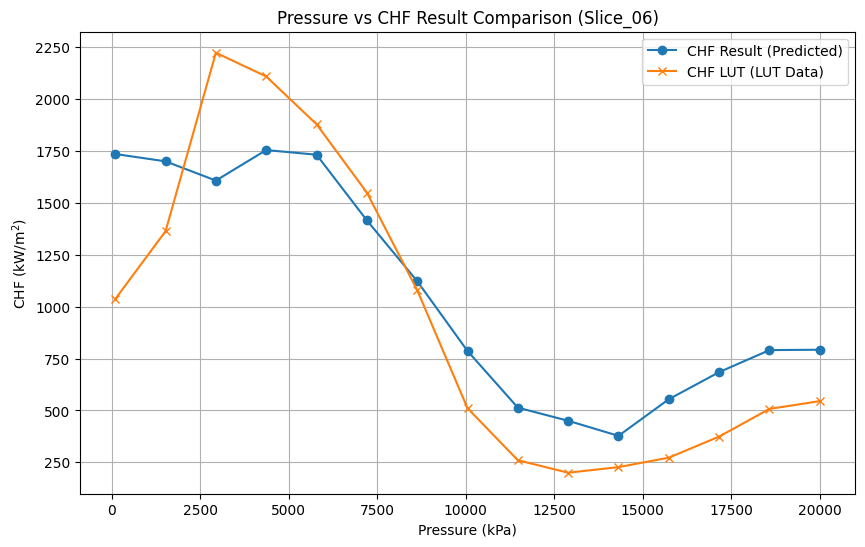

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Slice_06.csv file, skipping the first two rows
slice_data_6 = pd.read_csv('Slice_06.csv', skiprows=[1])

# Convert column 'Pressure' by multiplying by 10E-4
slice_data_6['Pressure'] = slice_data_6['Pressure'] * 10E-4

# Step 2: Preprocess the data (scaling the inputs)
x_slice_data_6 = []

for i, rows in slice_data_6.iterrows():
    x_slice_data_6.append([rows['Tube Diameter'], rows['Heated Length'], rows['Pressure'], rows['Mass Flux'], rows['Outlet Quality']])

x_slice_data_6 = scaler_x.transform(x_slice_data_6)
x_slice_data_6 = np.asarray(x_slice_data_6)

# Step 3: Make predictions
slice_predictions_6 = model.predict(x_slice_data_6)

# Step 4: Save the predictions to the 'CHF Result' column in the same file
slice_data_6['CHF Result'] = slice_predictions_6

# Save the updated dataframe to a new CSV file (optional)
slice_data_6.to_csv('Slice_06_predictions.csv', index=False)

# Step 5: Load the Slice_06_LUT.csv file and extract the CHF LUT values
slice_lut_6 = pd.read_csv('Slice_06_LUT.csv', skiprows=[1])
slice_lut_6['CHF LUT'] = slice_lut_6['CHF LUT'] * 10E-4

# Step 6: Plot Pressure vs CHF Result and compare it with CHF LUT
plt.figure(figsize=(10, 6))
plt.plot(slice_data_6['Pressure'], slice_data_6['CHF Result'], label='CHF Result (Predicted)', marker='o')
plt.plot(slice_data_6['Pressure'], slice_lut_6['CHF LUT'], label='CHF LUT (LUT Data)', marker='x')

plt.xlabel('Pressure (kPa)')
plt.ylabel('CHF (kW/m$^2$)')
plt.title('Pressure vs CHF Result Comparison (Slice_06)')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


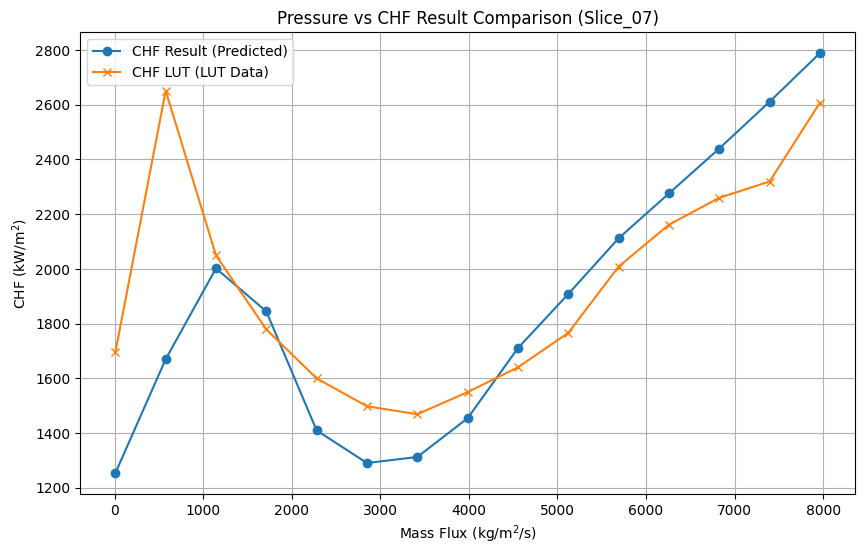

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Slice_07.csv file, skipping the first two rows
slice_data_7 = pd.read_csv('Slice_07.csv', skiprows=[1])

# Convert column 'Pressure' by multiplying by 10E-4
slice_data_7['Pressure'] = slice_data_7['Pressure'] * 10E-4

# Step 2: Preprocess the data (scaling the inputs)
x_slice_data_7 = []

for i, rows in slice_data_7.iterrows():
    x_slice_data_7.append([rows['Tube Diameter'], rows['Heated Length'], rows['Pressure'], rows['Mass Flux'], rows['Outlet Quality']])

x_slice_data_7 = scaler_x.transform(x_slice_data_7)
x_slice_data_7 = np.asarray(x_slice_data_7)

# Step 3: Make predictions
slice_predictions_7 = model.predict(x_slice_data_7)

# Step 4: Save the predictions to the 'CHF Result' column in the same file
slice_data_7['CHF Result'] = slice_predictions_7

# Save the updated dataframe to a new CSV file (optional)
slice_data_7.to_csv('Slice_07_predictions.csv', index=False)

# Step 5: Load the Slice_07_LUT.csv file and extract the CHF LUT values
slice_lut_7 = pd.read_csv('Slice_07_LUT.csv', skiprows=[1])
slice_lut_7['CHF LUT'] = slice_lut_7['CHF LUT'] * 10E-4

# Step 6: Plot Pressure vs CHF Result and compare it with CHF LUT
plt.figure(figsize=(10, 6))
plt.plot(slice_data_7['Mass Flux'], slice_data_7['CHF Result'], label='CHF Result (Predicted)', marker='o')
plt.plot(slice_data_7['Mass Flux'], slice_lut_7['CHF LUT'], label='CHF LUT (LUT Data)', marker='x')

plt.xlabel('Mass Flux (kg/m$^2$/s)')
plt.ylabel('CHF (kW/m$^2$)')
plt.title('Pressure vs CHF Result Comparison (Slice_07)')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


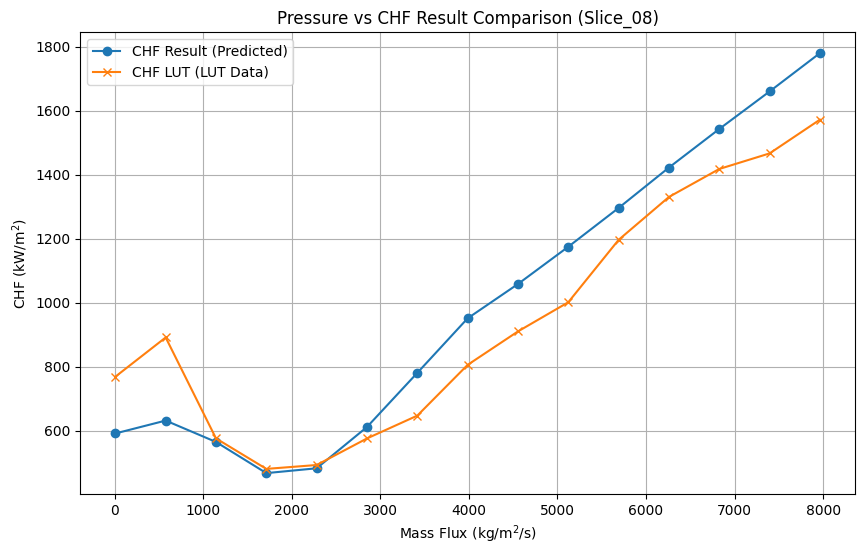

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Slice_08.csv file, skipping the first two rows
slice_data_8 = pd.read_csv('Slice_08.csv', skiprows=[1])

# Convert column 'Pressure' by multiplying by 10E-4
slice_data_8['Pressure'] = slice_data_8['Pressure'] * 10E-4

# Step 2: Preprocess the data (scaling the inputs)
x_slice_data_8 = []

for i, rows in slice_data_8.iterrows():
    x_slice_data_8.append([rows['Tube Diameter'], rows['Heated Length'], rows['Pressure'], rows['Mass Flux'], rows['Outlet Quality']])

x_slice_data_8 = scaler_x.transform(x_slice_data_8)
x_slice_data_8 = np.asarray(x_slice_data_8)

# Step 3: Make predictions
slice_predictions_8 = model.predict(x_slice_data_8)

# Step 4: Save the predictions to the 'CHF Result' column in the same file
slice_data_8['CHF Result'] = slice_predictions_8

# Save the updated dataframe to a new CSV file (optional)
slice_data_8.to_csv('Slice_08_predictions.csv', index=False)

# Step 5: Load the Slice_08_LUT.csv file and extract the CHF LUT values
slice_lut_8 = pd.read_csv('Slice_08_LUT.csv', skiprows=[1])
slice_lut_8['CHF LUT'] = slice_lut_8['CHF LUT'] * 10E-4

# Step 6: Plot Pressure vs CHF Result and compare it with CHF LUT
plt.figure(figsize=(10, 6))
plt.plot(slice_data_8['Mass Flux'], slice_data_8['CHF Result'], label='CHF Result (Predicted)', marker='o')
plt.plot(slice_data_8['Mass Flux'], slice_lut_8['CHF LUT'], label='CHF LUT (LUT Data)', marker='x')

plt.xlabel('Mass Flux (kg/m$^2$/s)')
plt.ylabel('CHF (kW/m$^2$)')
plt.title('Pressure vs CHF Result Comparison (Slice_08)')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


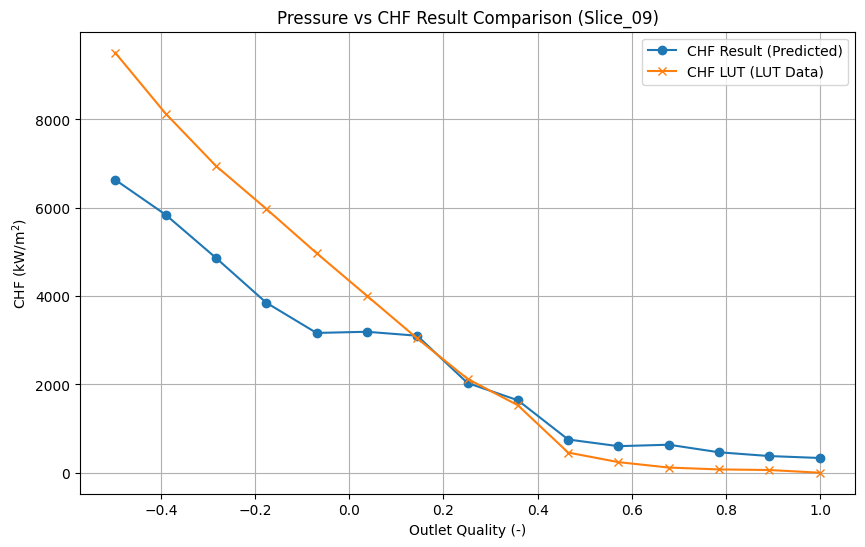

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Slice_09.csv file, skipping the first two rows
slice_data_9 = pd.read_csv('Slice_09.csv', skiprows=[1])

# Convert column 'Pressure' by multiplying by 10E-4
slice_data_9['Pressure'] = slice_data_9['Pressure'] * 10E-4

# Step 2: Preprocess the data (scaling the inputs)
x_slice_data_9 = []

for i, rows in slice_data_9.iterrows():
    x_slice_data_9.append([rows['Tube Diameter'], rows['Heated Length'], rows['Pressure'], rows['Mass Flux'], rows['Outlet Quality']])

x_slice_data_9 = scaler_x.transform(x_slice_data_9)
x_slice_data_9 = np.asarray(x_slice_data_9)

# Step 3: Make predictions
slice_predictions_9 = model.predict(x_slice_data_9)

# Step 4: Save the predictions to the 'CHF Result' column in the same file
slice_data_9['CHF Result'] = slice_predictions_9

# Save the updated dataframe to a new CSV file (optional)
slice_data_9.to_csv('Slice_09_predictions.csv', index=False)

# Step 5: Load the Slice_09_LUT.csv file and extract the CHF LUT values
slice_lut_9 = pd.read_csv('Slice_09_LUT.csv', skiprows=[1])
slice_lut_9['CHF LUT'] = slice_lut_9['CHF LUT'] * 10E-4

# Step 6: Plot Pressure vs CHF Result and compare it with CHF LUT
plt.figure(figsize=(10, 6))
plt.plot(slice_data_9['Outlet Quality'], slice_data_9['CHF Result'], label='CHF Result (Predicted)', marker='o')
plt.plot(slice_data_9['Outlet Quality'], slice_lut_9['CHF LUT'], label='CHF LUT (LUT Data)', marker='x')

plt.xlabel('Outlet Quality (-)')
plt.ylabel('CHF (kW/m$^2$)')
plt.title('Pressure vs CHF Result Comparison (Slice_09)')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


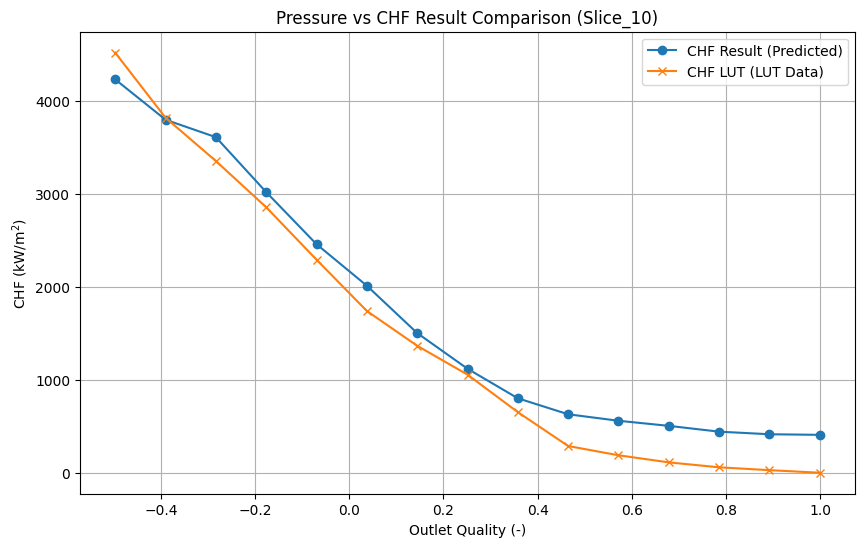

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Slice_10.csv file, skipping the first two rows
slice_data_10 = pd.read_csv('Slice_10.csv', skiprows=[1])

# Convert column 'Pressure' by multiplying by 10E-4
slice_data_10['Pressure'] = slice_data_10['Pressure'] * 10E-4

# Step 2: Preprocess the data (scaling the inputs)
x_slice_data_10 = []

for i, rows in slice_data_10.iterrows():
    x_slice_data_10.append([rows['Tube Diameter'], rows['Heated Length'], rows['Pressure'], rows['Mass Flux'], rows['Outlet Quality']])

x_slice_data_10 = scaler_x.transform(x_slice_data_10)
x_slice_data_10 = np.asarray(x_slice_data_10)

# Step 3: Make predictions
slice_predictions_10 = model.predict(x_slice_data_10)

# Step 4: Save the predictions to the 'CHF Result' column in the same file
slice_data_10['CHF Result'] = slice_predictions_10

# Save the updated dataframe to a new CSV file (optional)
slice_data_10.to_csv('Slice_10_predictions.csv', index=False)

# Step 5: Load the Slice_10_LUT.csv file and extract the CHF LUT values
slice_lut_10 = pd.read_csv('Slice_10_LUT.csv', skiprows=[1])
slice_lut_10['CHF LUT'] = slice_lut_10['CHF LUT'] * 10E-4

# Step 6: Plot Pressure vs CHF Result and compare it with CHF LUT
plt.figure(figsize=(10, 6))
plt.plot(slice_data_10['Outlet Quality'], slice_data_10['CHF Result'], label='CHF Result (Predicted)', marker='o')
plt.plot(slice_data_10['Outlet Quality'], slice_lut_10['CHF LUT'], label='CHF LUT (LUT Data)', marker='x')

plt.xlabel('Outlet Quality (-)')
plt.ylabel('CHF (kW/m$^2$)')
plt.title('Pressure vs CHF Result Comparison (Slice_10)')
plt.legend()
plt.grid(True)
plt.show()